[nltk_data] Downloading package stopwords to C:\Users\may/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


n_neighbors=10, Accuracy=0.9338
n_neighbors=110, Accuracy=0.9087
n_neighbors=210, Accuracy=0.8907
n_neighbors=310, Accuracy=0.8860
n_neighbors=410, Accuracy=0.8857
n_neighbors=510, Accuracy=0.8811
n_neighbors=610, Accuracy=0.8777
n_neighbors=710, Accuracy=0.8743
n_neighbors=810, Accuracy=0.8707
n_neighbors=910, Accuracy=0.8665


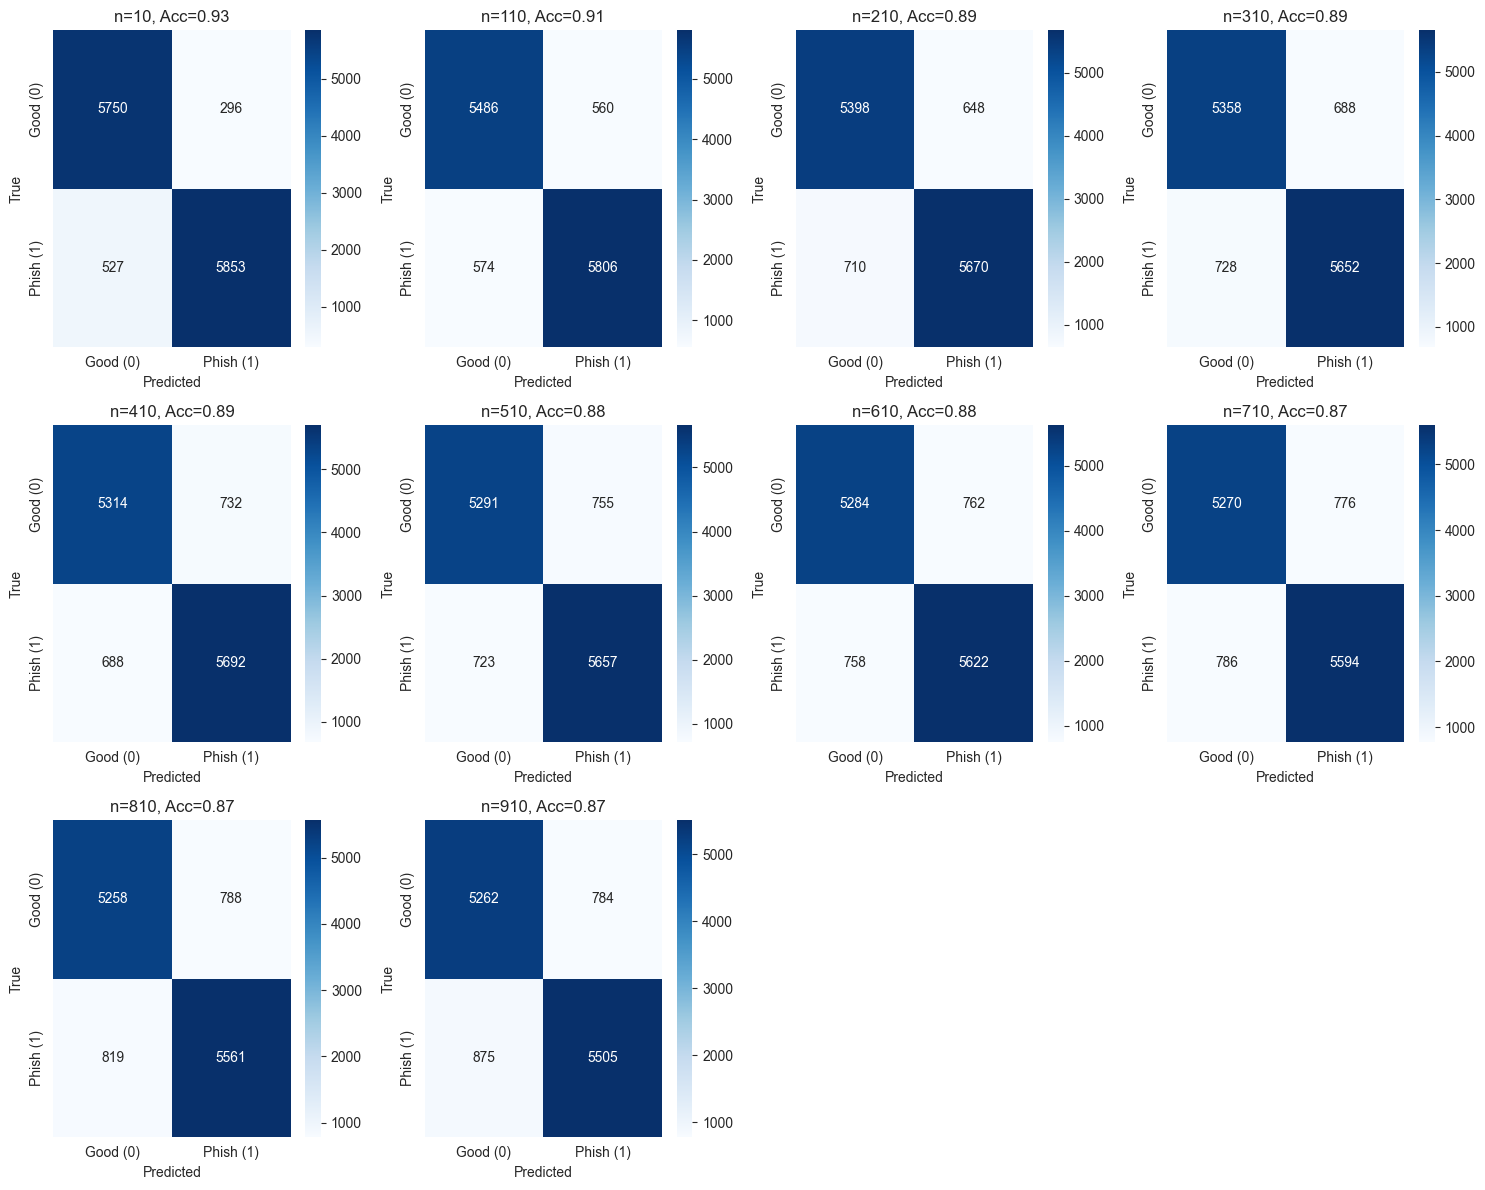

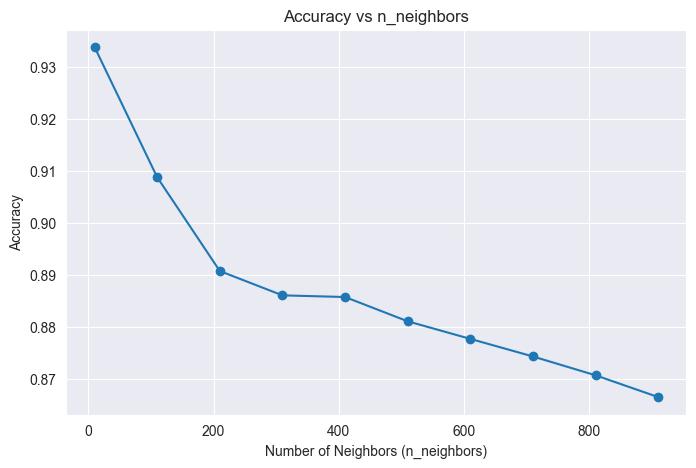

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack

# Load dataset
df_1 = pd.read_csv(r"C:\Users\may\Desktop\dataset\CEAS_08.csv")
df_2 = pd.read_csv(r"C:\Users\may\Desktop\dataset\data.csv")
df_3 = pd.read_csv(r"C:\Users\may\Desktop\dataset\balanced.csv")

# Extract relevant features and target
df_1 = df_1[['sender', 'subject', 'body', 'label']]
df_2 = df_2.rename(columns={'Email Text': 'body', 'Email Type': 'label'})
df_3 = df_3.rename(columns={'class': 'label'})

# Convert Email Type to boolean
df_2['label'] = df_2['label'].map({'Safe Email': 0, 'Phishing Email': 1})

# Remove empty values
df_1 = df_1.dropna(subset=['body', 'subject', 'label'])
df_2 = df_2.dropna(subset=['body'])
df_3 = df_3.dropna(subset=['body', 'label'])

# Add missing columns
df_2['sender'] = ''
df_2['subject'] = ''
df_3['sender'] = ''
df_3['subject'] = ''

# Combine datasets
df = pd.concat([df_1, df_2, df_3], ignore_index=True)
df = df[df['label'].isin([0, 1])]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text Cleaning Function
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply text cleaning
df['cleaned_sender'] = df['sender'].apply(clean_text)
df['cleaned_subject'] = df['subject'].apply(clean_text)
df['cleaned_body'] = df['body'].apply(clean_text)

# TF-IDF Vectorization
tfidf_sender = TfidfVectorizer()
tfidf_subject = TfidfVectorizer()
tfidf_body = TfidfVectorizer()

X_sender = tfidf_sender.fit_transform(df['cleaned_sender'])
X_subject = tfidf_subject.fit_transform(df['cleaned_subject'])
X_body = tfidf_body.fit_transform(df['cleaned_body'])

# Combine all features
X_combined = hstack((X_sender, X_subject, X_body))
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define range for n_neighbors (10 to 1000, step size 50)
n_neighbors_list = range(10, 1001, 100)

# Store results
confusion_matrices = {}
accuracies = {}

# Train models with different n_neighbors
for n in n_neighbors_list:
    knn_model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    knn_model.fit(X_train, y_train)

    # Predictions
    y_pred = knn_model.predict(X_test)

    # Store metrics
    accuracies[n] = accuracy_score(y_test, y_pred)
    confusion_matrices[n] = confusion_matrix(y_test, y_pred)

    # Print progress
    print(f"n_neighbors={n}, Accuracy={accuracies[n]:.4f}")

# Plot Confusion Matrices
n_plots = len(n_neighbors_list)
n_cols = 4
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for idx, (n, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Good (0)', 'Phish (1)'],
                yticklabels=['Good (0)', 'Phish (1)'],
                ax=axes[idx])
    axes[idx].set_title(f"n={n}, Acc={accuracies[n]:.2f}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("True")

# Hide unused subplots
for i in range(n_plots, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Plot accuracy vs n_neighbors
plt.figure(figsize=(8, 5))
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs n_neighbors")
plt.grid(True)
plt.show()

[nltk_data] Downloading package stopwords to C:\Users\may/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


n_neighbors=1, Accuracy=0.8247
n_neighbors=2, Accuracy=0.7901
n_neighbors=3, Accuracy=0.8007
n_neighbors=4, Accuracy=0.8165
n_neighbors=5, Accuracy=0.7578
n_neighbors=6, Accuracy=0.9426
n_neighbors=7, Accuracy=0.9401
n_neighbors=8, Accuracy=0.9384
n_neighbors=9, Accuracy=0.9361


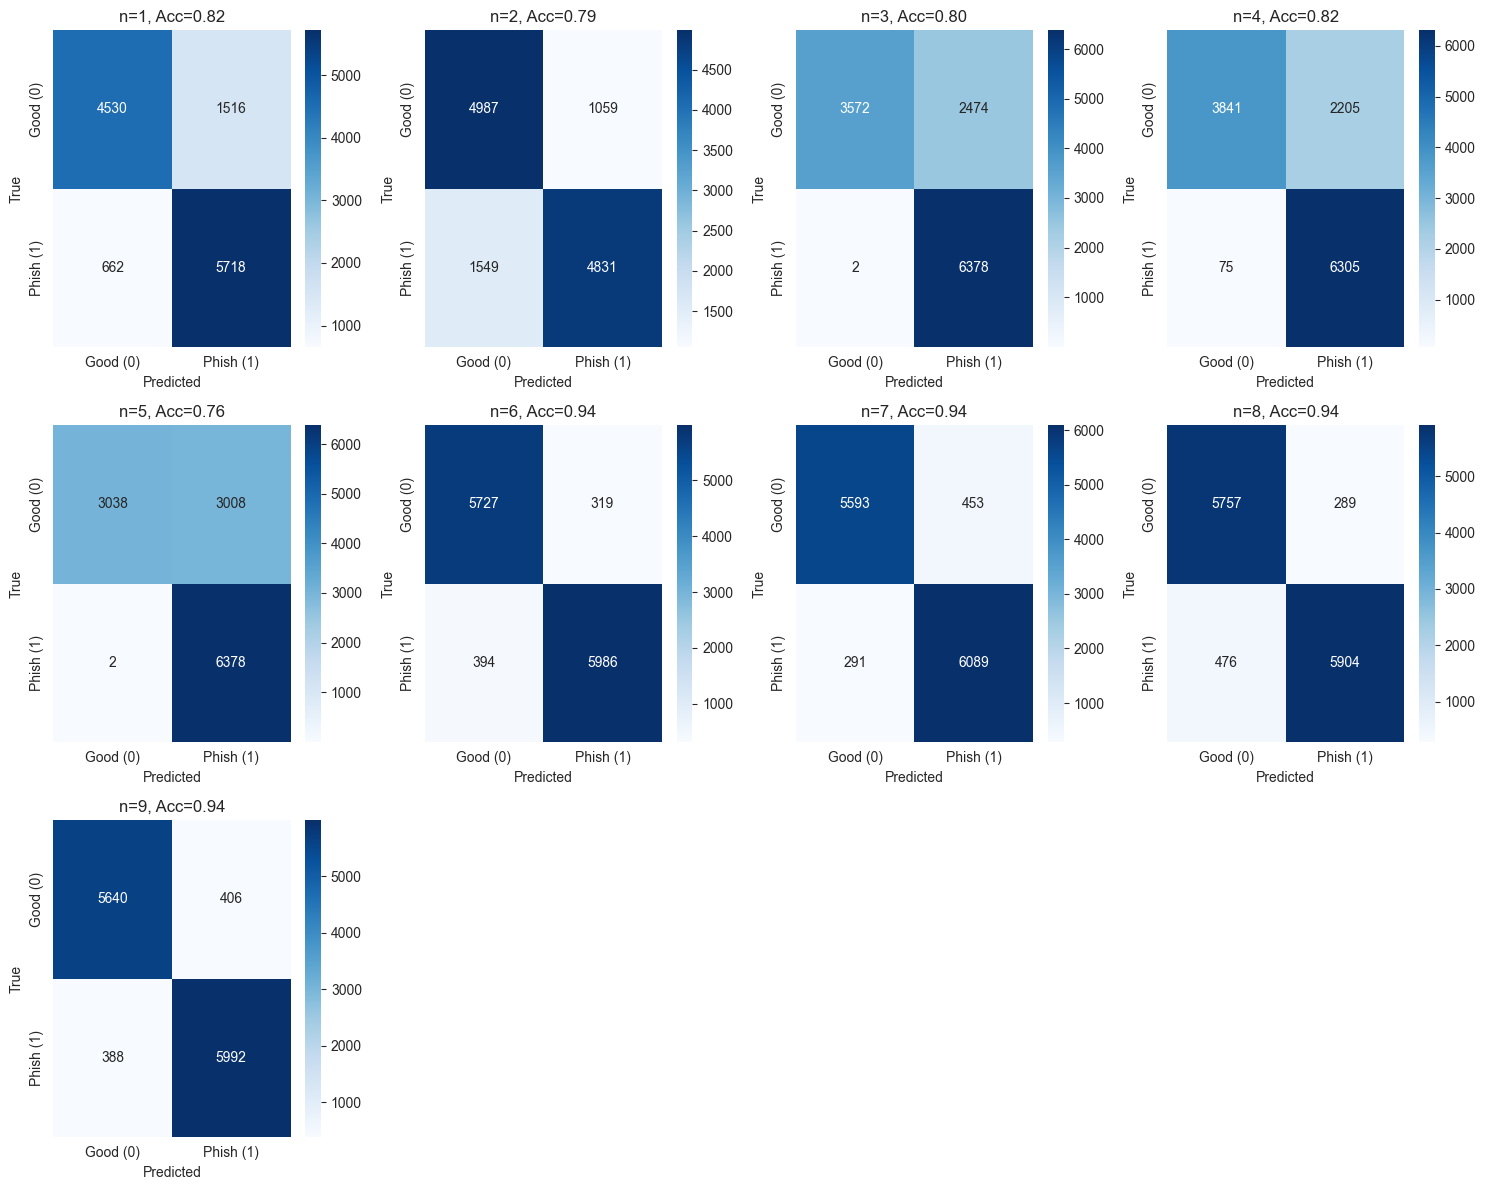

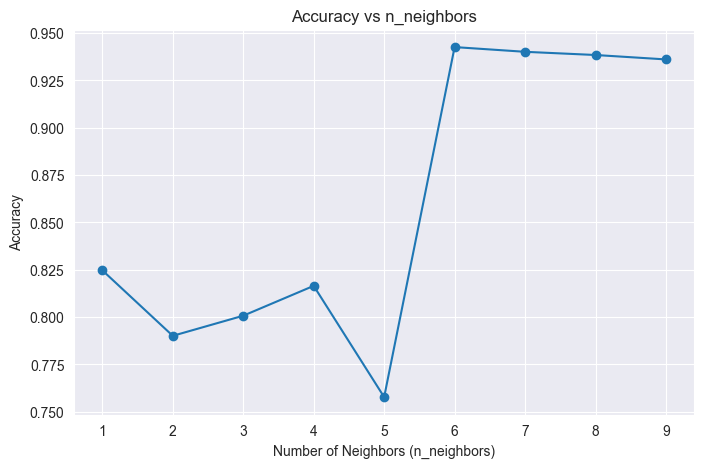

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack

# Load dataset
df_1 = pd.read_csv(r"C:\Users\may\Desktop\dataset\CEAS_08.csv")
df_2 = pd.read_csv(r"C:\Users\may\Desktop\dataset\data.csv")
df_3 = pd.read_csv(r"C:\Users\may\Desktop\dataset\balanced.csv")

# Extract relevant features and target
df_1 = df_1[['sender', 'subject', 'body', 'label']]
df_2 = df_2.rename(columns={'Email Text': 'body', 'Email Type': 'label'})
df_3 = df_3.rename(columns={'class': 'label'})

# Convert Email Type to boolean
df_2['label'] = df_2['label'].map({'Safe Email': 0, 'Phishing Email': 1})

# Remove empty values
df_1 = df_1.dropna(subset=['body', 'subject', 'label'])
df_2 = df_2.dropna(subset=['body'])
df_3 = df_3.dropna(subset=['body', 'label'])

# Add missing columns
df_2['sender'] = ''
df_2['subject'] = ''
df_3['sender'] = ''
df_3['subject'] = ''

# Combine datasets
df = pd.concat([df_1, df_2, df_3], ignore_index=True)
df = df[df['label'].isin([0, 1])]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text Cleaning Function
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply text cleaning
df['cleaned_sender'] = df['sender'].apply(clean_text)
df['cleaned_subject'] = df['subject'].apply(clean_text)
df['cleaned_body'] = df['body'].apply(clean_text)

# TF-IDF Vectorization
tfidf_sender = TfidfVectorizer()
tfidf_subject = TfidfVectorizer()
tfidf_body = TfidfVectorizer()

X_sender = tfidf_sender.fit_transform(df['cleaned_sender'])
X_subject = tfidf_subject.fit_transform(df['cleaned_subject'])
X_body = tfidf_body.fit_transform(df['cleaned_body'])

# Combine all features
X_combined = hstack((X_sender, X_subject, X_body))
y = df['label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Define range for n_neighbors (10 to 1000, step size 50)
n_neighbors_list = range(1, 10, 1)

# Store results
confusion_matrices = {}
accuracies = {}

# Train models with different n_neighbors
for n in n_neighbors_list:
    knn_model = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    knn_model.fit(X_train, y_train)

    # Predictions
    y_pred = knn_model.predict(X_test)

    # Store metrics
    accuracies[n] = accuracy_score(y_test, y_pred)
    confusion_matrices[n] = confusion_matrix(y_test, y_pred)

    # Print progress
    print(f"n_neighbors={n}, Accuracy={accuracies[n]:.4f}")

# Plot Confusion Matrices
n_plots = len(n_neighbors_list)
n_cols = 4
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for idx, (n, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Good (0)', 'Phish (1)'],
                yticklabels=['Good (0)', 'Phish (1)'],
                ax=axes[idx])
    axes[idx].set_title(f"n={n}, Acc={accuracies[n]:.2f}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("True")

# Hide unused subplots
for i in range(n_plots, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Plot accuracy vs n_neighbors
plt.figure(figsize=(8, 5))
plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs n_neighbors")
plt.grid(True)
plt.show()